In [88]:
import numpy as np
from numpy import genfromtxt
import csv
import matplotlib.pyplot as plt
from scipy import interpolate

In [89]:
M = 1024

In [90]:
my_data = genfromtxt('pressure_log.csv', delimiter=',')
t = my_data[:,0]
Y = my_data[:,1]

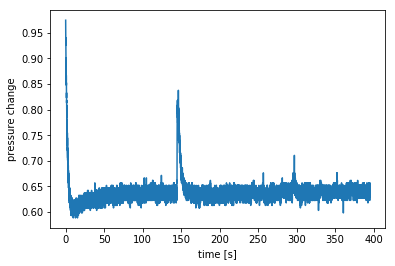

In [91]:
plt.plot(t - t[0], Y)
plt.xlabel('time [s]')
plt.ylabel('Differential Pressure [kPa]')
plt.show()

### We probably want to crop the first couple of seconds as the sensor probably needs some time to adjust itself.

In [92]:
cropIdx = np.argmin(np.abs(t - (8+t[0])))

In [93]:
t = t[cropIdx:]
Y = Y[cropIdx:]

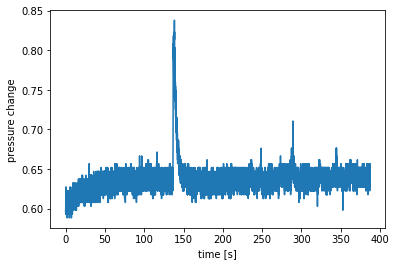

In [94]:
plt.plot(t - t[0], Y)
plt.xlabel('time [s]')
plt.ylabel('Differential Pressure [kPa]')
plt.show()

### Generate equidistant signal

In [95]:
f = interpolate.interp1d(t, Y)
t_ed = np.linspace(start=t[0],stop=t[-1],num=len(t))

In [96]:
Y_ed = f(t_ed)

# Fourier Analysis

In [97]:
f_s = 1 / np.mean(np.diff(t_ed))
print('Sampling frequency %.2f Hz' % (f_s))

Sampling frequency 53.41 Hz


In [98]:
X = np.fft.fft(Y_ed)

In [99]:
freqs = f_s * np.fft.fftfreq(len(Y_ed))

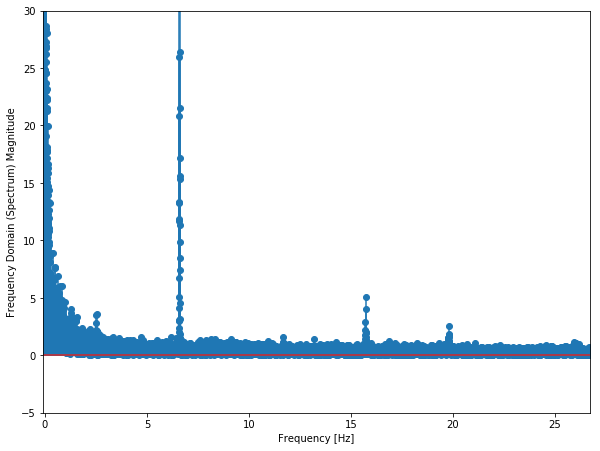

In [100]:
fig, ax = plt.subplots(figsize=(9.8, 7.4))

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-0.1, f_s / 2)
ax.set_ylim(-5, 30)

plt.show()

# Compute Spectrogram

In [101]:
from scipy import signal
freqs, times, Sx = signal.spectrogram(Y_ed, fs=f_s, window='hanning',
                                      nperseg=1024, noverlap=M - 100,
                                      detrend=False, scaling='spectrum')

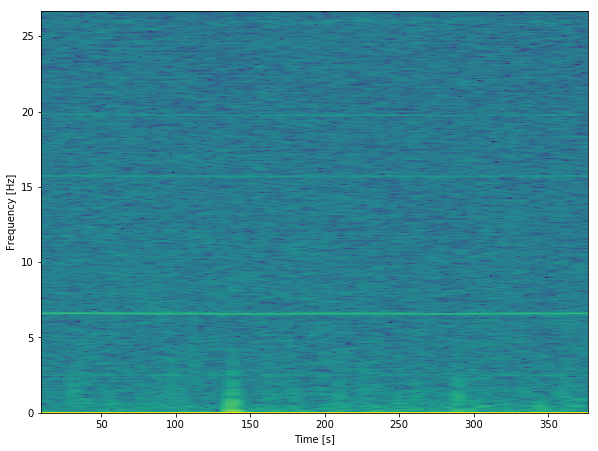

In [102]:
f, ax = plt.subplots(figsize=(9.8, 7.4))
ax.pcolormesh(times, freqs,   np.log10(Sx))
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [s]');
plt.show()